# Plotting multiple series on the same axes for all turbines

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE71EBE630>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001CE0AC475C0>], dtype=object)

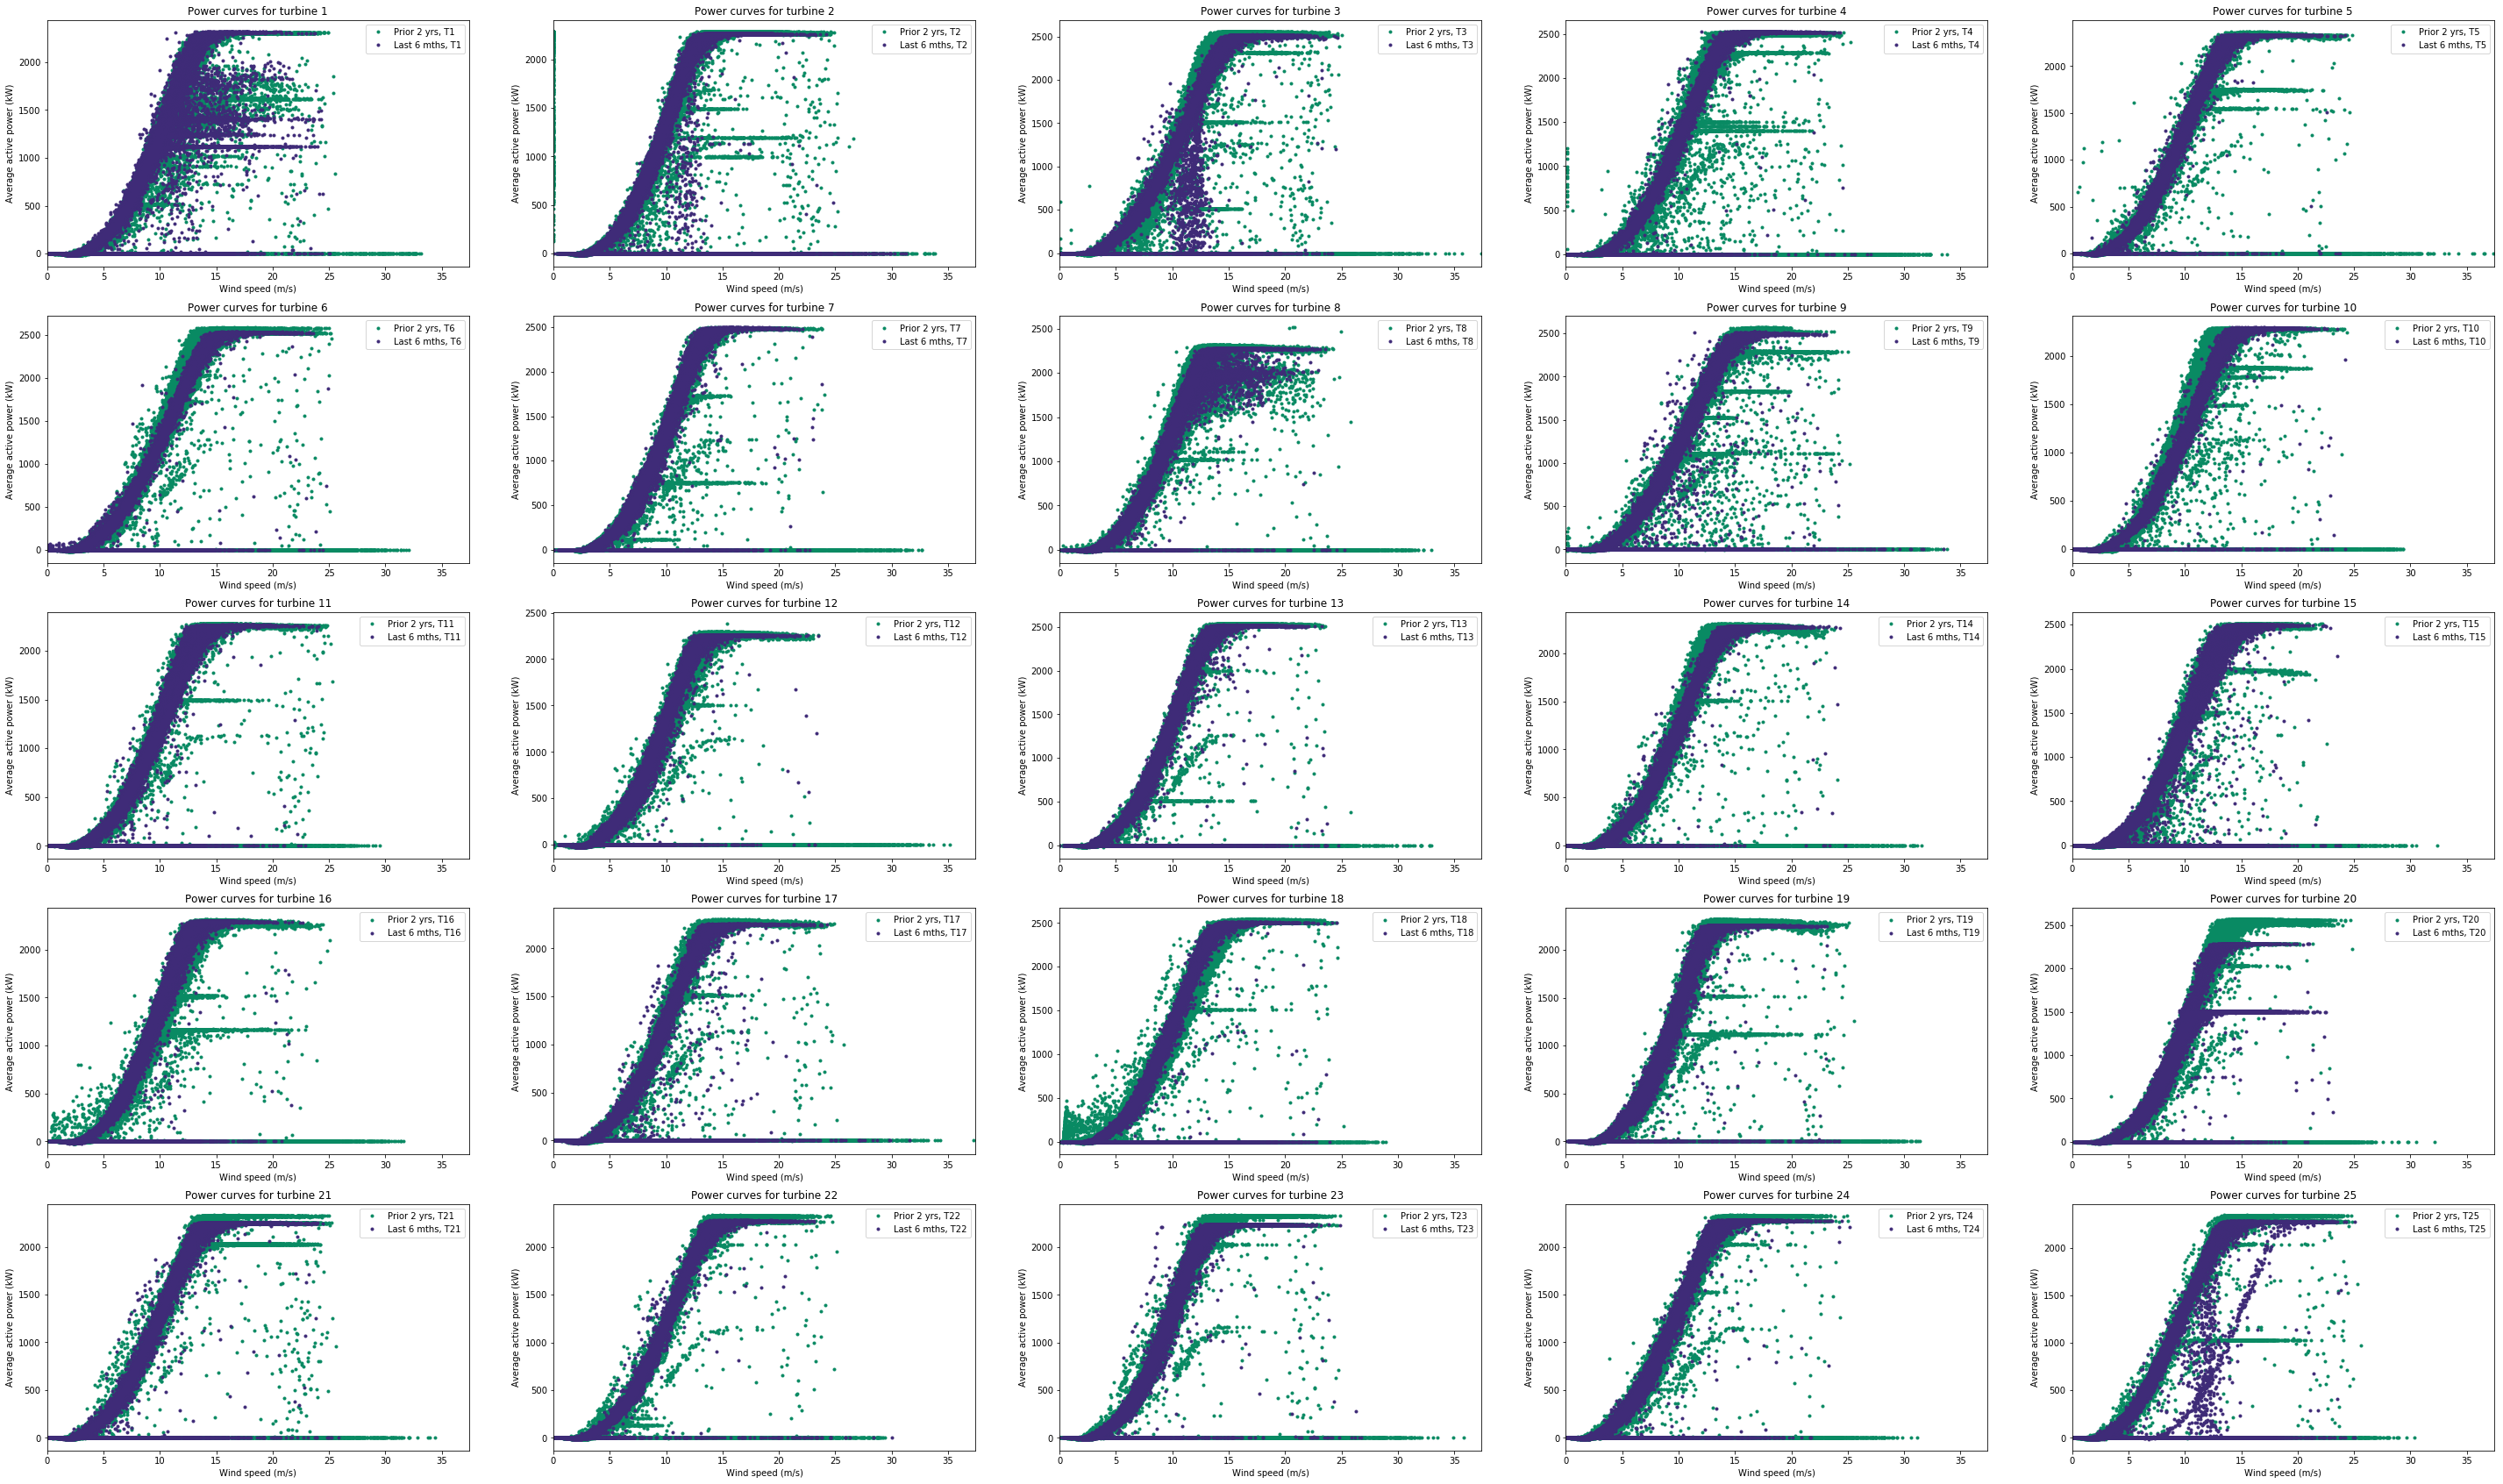

In [2]:
#import libraries
import pandas as pd
import itertools
%matplotlib inline

#create dataframe from csv
df=pd.read_csv('C:/Users/nithi/Google Drive/Python/Student Data/Prior_two_years_SCADA.csv',skip_blank_lines=True)
df2=pd.read_csv('C:/Users/nithi/Google Drive/Python/Student Data/Last_six_months_SCADA.csv',skip_blank_lines=True)

#create pivot table 
power1=pd.pivot_table(df,index=['ws_av'],columns=['turbine'],values=['ap_av'])

#create second dataframe 
power2=pd.pivot_table(df2,index=['ws_av'],columns=['turbine'],values=['ap_av'])

#removing pivot table values name from heading
power1.columns=power1.columns.droplevel(0)

#repeat with second dataframe
power2.columns=power2.columns.droplevel(0)

#list of column headers (i.e. turbines 1 to 25)
list1=power1.columns.tolist()

#create new list for individual subplot titles
list2=['Power curves for turbine %s' % x for x in list1]
list5=['Normalised power curves for turbine %s' % x for x in list1]

#rename legend for series using new list
list3=['Prior 2 yrs, T%s' % x for x in list1]
power1.columns=list3

#repeat with second dataframe 
list4=['Last 6 mths, T%s' % x for x in list1]
power2.columns=list4

#rename index name
power1.index.name='Wind speed (m/s)'
power2.index.name='Wind speed (m/s)'

#plotting all columns (i.e., turbines 1 to 25) in the same figure 
ax=power1.plot(subplots=True,figsize=(50,30),layout=(5,5),style='.',color='#098A63',sharex=False,title=list2)

list5=list(range(0,5)) #based on layout=(x,y), create lists with range(0,x) and (0,y)
list6=list(itertools.product(list5,list5)) #get coordinates of each subplot
for (x,y) in list6:
    ax[x][y].set_ylabel('Average active power (kW)')

#second series dataframe on same axes
power2.plot(ax=ax,subplots=True,figsize=(50,30),style='.',color='#3F2B78',sharex=False)

In [ ]:
#write to csv
power1.to_csv('power1.csv')
power2.to_csv('power2.csv')

#write to xlsx
writer=pd.ExcelWriter('power2.xlsx',engine='xlsxwriter')
power1.to_excel(writer,sheet_name='Sheet1')
#write second dataframe in different sheet
power2.to_excel(writer,sheet_name='Sheet2')
writer.save()